In [1]:
import perceval as pcvl
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Functions import *
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from tabulate import tabulate
from Convolution import createWaves
from CNOTcalculator import calculateCNOT

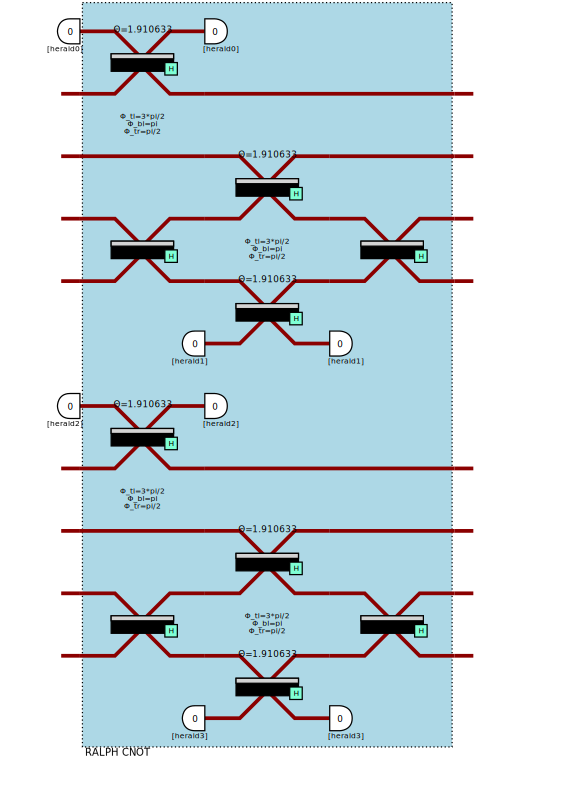

In [6]:
n = 3 #Nombre de modes spatiaux
m = 3 #Nombre de modes internes
k = 3 #Nombre de photon
cnot = pcvl.Circuit(12, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
#first copy
cnot.add((6, 7), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((9, 10), pcvl.BS.H())
cnot.add((8, 9), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((10, 11), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((9, 10), pcvl.BS.H())

p = pcvl.Processor("Naive", cnot)
#p.set_postprocess(lambda s: (s[1] or s[2] or s[7] or s[8]) and (s[3] or s[4] or s[9] or s[10]))
p.add_herald(0, 0)
p.add_herald(5, 0)
p.add_herald(6, 0)
p.add_herald(11, 0)

pcvl.pdisplay(p, recursive = True)




In [7]:
TableValue,compareVal,realValMax,realValMin,delayVal = calculateCNOT(p) #[0,1,1,0] == |10>

0.9976092363992392
0.997066*|0,1,1,0,0,0,0,0>+0.076549*|0,1,0,0,0,0,1,0>
statesProb
|0,1,0,1> 0.4980467671863915
|0,0,1,1> 0.49804676718639135
|0,2,0,0> 0.0009766164068042756
|0,1,1,0> 0.0019532328136085512
|0,0,2,0> 0.0009766164068042756


[0.3262157686685896]
[0.8642579622718675]
[0.8406719080700941]


TypeError: float() argument must be a string or a number, not 'dict'

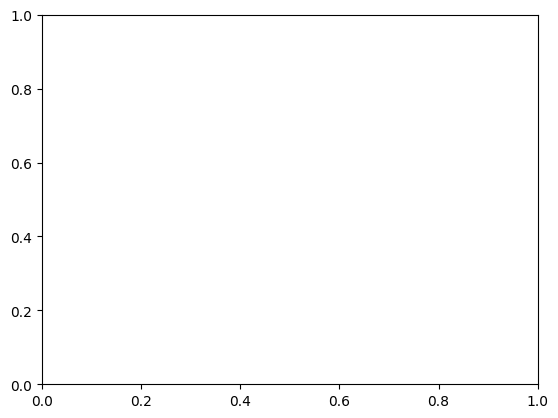

In [8]:
print(delayVal)
print(realValMax)
print(realValMin)

plt.plot(delayVal,np.array(compareVal),label = 'Valeur du modèle')
plt.plot(delayVal,realValMax,label = 'Valeur mesurée 10 -> 11')
plt.plot(delayVal,realValMin,label = 'Valeur mesurée 11 -> 10')
plt.xlabel('Delays [ps]')
plt.ylabel('Probability')
plt.title(r'Valeur des éléments HOM de la CNOT en fonction du délais')
plt.legend()
print(compareVal)

In [5]:
""" for i,j in compareVal[0].items():
    print(i,j) """

bs10 = pcvl.BasicState([0,1,1,0])
bs11 = pcvl.BasicState([0,1,0,1])

A10 = compareVal[0][bs10]
A11 = compareVal[0][bs11]
normalized = {}

normalized[bs10] = A10/(A10+A11)
normalized[bs11] = A11/(A11+A10)
for i,j in normalized.items():
    print(i,j)

|0,1,1,0> 0.003906465627217103
|0,1,0,1> 0.9960935343727829


In [6]:
2*(1-0.9976092363992392)

0.004781527201521696

In [7]:
2*(1-0.4911276570475002)

1.0177446859049994

In [8]:
normalized[bs10]/normalized[bs11]

0.003921785949225052